In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
print(tf.__version__)

2.3.0


In [2]:
from sklearn.externals import joblib
from sklearn import datasets
from skimage.feature import hog
from sklearn.svm import LinearSVC
import numpy as np
from collections import Counter

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# **Digits detection**

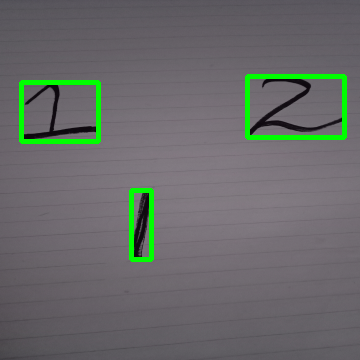

In [110]:
import cv2
from google.colab.patches import cv2_imshow


im = cv2.imread("/content/digit3.jpg", cv2.IMREAD_UNCHANGED)
im = cv2.resize(im, (360, 360), interpolation = cv2.INTER_AREA)

# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (7, 7), 2)

# Threshold the image
ret, im_th = cv2.threshold(im_gray, 65, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

# For each rectangular region, calculate HOG features and predict
# the digit using Linear SVM.
for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the rectangular region around the digit
    
cv2_imshow(im)

